# Classification

In [114]:
import csv
import math
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import display, HTML
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

#### Zad 1

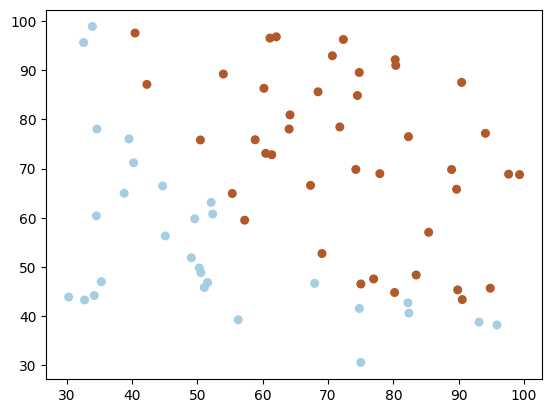

In [115]:
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)
 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

fig = plt.figure(1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

In [116]:
def classify(X, y, example, k):
    '''
    :param X: zbiór (uczący) danych postaci ndarray (m, n), gdzie m to liczba przykładów, a n liczba cech
    :param y: zbiór wartości (labels) w postaci wektora ndarray (m, ). Każdy z elementów ma wartość 0 lub 1
    :param example: wektor cech danego przykładu postaci ndarray (n, )
    :param k: parametr k algorytmu knn
    :return: predykcja klasy przykładu. 0 lub 1
    '''
    # 1. iteruj po wszystkich przykładach ze zbioru uczącego - X
    kolection = list()
    for count, x in enumerate(X):
    #     a. dla każdego z przykładów oblicz dystans między aktualnie rozważanym przykładem uczącym a przykładem example, który jest poddany klasyfikacji
        dist = math.dist(x, example)
    #     b. zapisz w kolekcji parę (dystans, klasa przykładu uczącego)
        kolection.append((dist, bool(y[count])))
    # 2. posortuj kolekcję względem dystansów, rosnąco
    kolection.sort(key= lambda el: el[0])
    # 3. wybierz k pierwszych elementów (k najkrótszych dystansów)
    kolection = kolection[:k]
    # 4. klasa rozważanego przykładu example będzie taka jak większość wśród k przykładów z najkrótszym dystansem
    #print(kolection)
    return Counter(list(zip(*kolection))[1]).most_common(1)[0][0]

print(classify(x_train, y_train, (80, 42), 100))

True


              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        11
         1.0       0.95      0.95      0.95        19

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



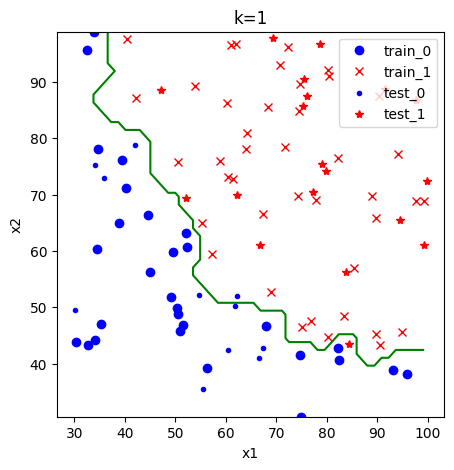

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86        11
         1.0       0.90      0.95      0.92        19

    accuracy                           0.90        30
   macro avg       0.90      0.88      0.89        30
weighted avg       0.90      0.90      0.90        30



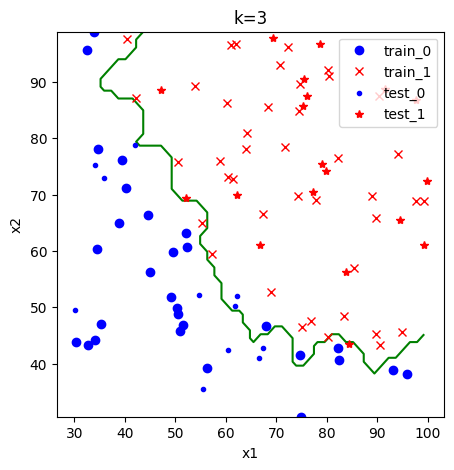

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        11
         1.0       0.95      0.95      0.95        19

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



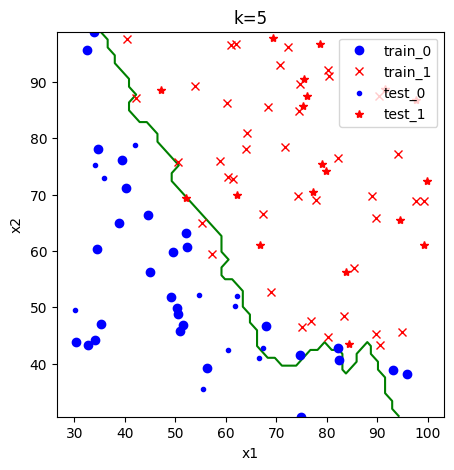

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        11
         1.0       0.95      1.00      0.97        19

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



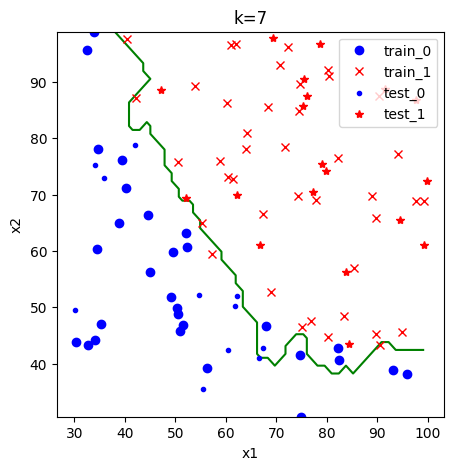

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



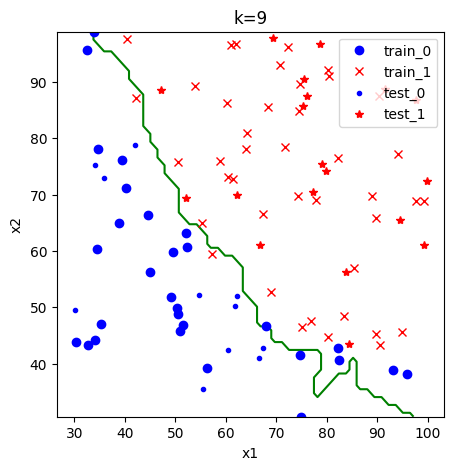

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



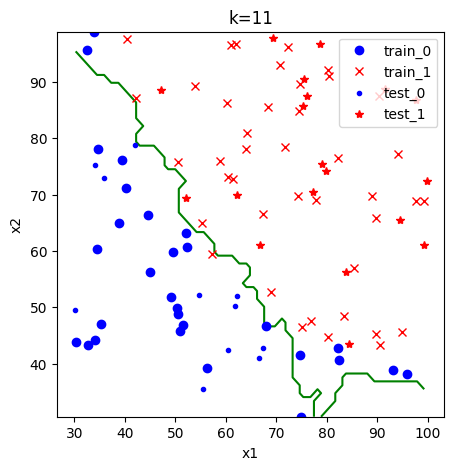

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       1.00      0.95      0.97        19

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



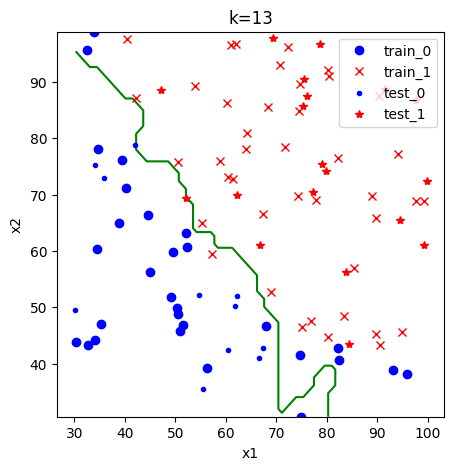

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        11
         1.0       0.95      0.95      0.95        19

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



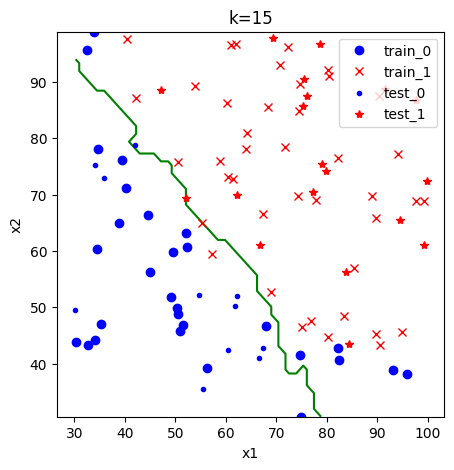

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        11
         1.0       0.95      1.00      0.97        19

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



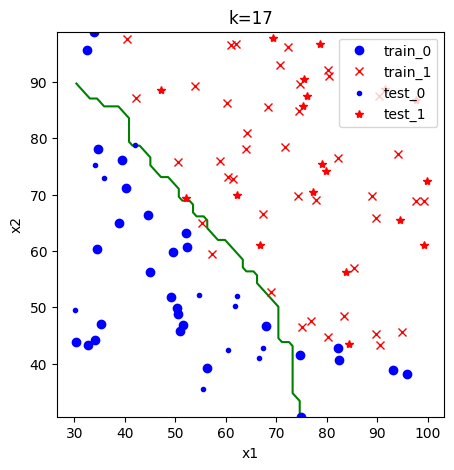

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



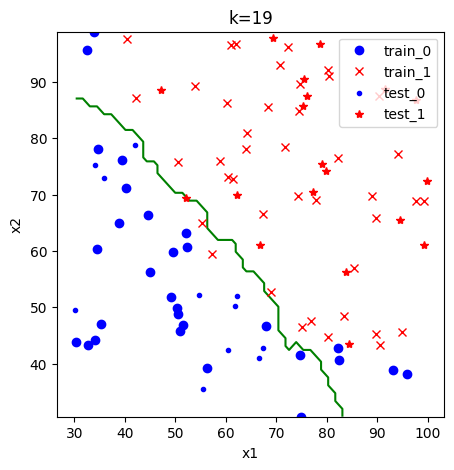

In [117]:
# setup plot
for k in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]:

    y_pred = np.zeros(y_test.shape)
    for example_idx, example in enumerate(x_test):
        pred = classify(x_train, y_train, example, k)
        y_pred[example_idx] = pred
    print()

    display(HTML(f"<p style='text-align: center;'> ----------------------- k = {k} ----------------------- </p>"))
    print(classification_report(y_test, y_pred))
    

    plt.figure(figsize=(5, 5))
    plt.title(f'k={k}')
    plt.xlabel('x1')
    plt.ylabel('x2')

    # prepare data for contour plot
    x1_res = 50
    x2_res = 50
    x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
    x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
    x1x1, x2x2 = np.meshgrid(x1, x2)
    x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
    labels_space = np.zeros((x1_res, x2_res))
    for row_idx in range(x2_res):
        for col_idx in range(x1_res):
            example = np.array([x1[col_idx], x2[row_idx]])
            pred = classify(x_train, y_train, example, k)
            labels_space[row_idx, col_idx] = pred
    # plot decision boundary
    plt.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')

    # plot training set
    plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
    plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')

    # plot test set
    plt.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
    plt.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')

    #plot

    plt.legend(['train_0', 'train_1', 'test_0', 'test_1'])

    plt.show()

In [118]:
data = load_digits()
y = data['target']
x = data['data']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)


for k in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]:
    knn_classifier = KNeighborsClassifier(k)
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_test)

    print(f"---------------------k = {k}----------------------")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

---------------------k = 1----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.98      1.00      0.99        54
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        67
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        44
           8       1.00      0.98      0.99        57
           9       1.00      1.00      1.00        55

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540

[[57  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  0  0  0]
 [ 0  0  0  0 67  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  

In [119]:
for lvl in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]:
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
    decision_tree.fit(x_train, y_train)
    
    y_pred = decision_tree.predict(x_test)
    print(f"---------------------lvl = {lvl}----------------------")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

---------------------lvl = 1----------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.00      0.00      0.00        54
           2       0.00      0.00      0.00        48
           3       0.16      0.92      0.28        49
           4       0.00      0.00      0.00        67
           5       0.00      0.00      0.00        46
           6       0.24      0.98      0.38        63
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00        57
           9       0.00      0.00      0.00        55

    accuracy                           0.20       540
   macro avg       0.04      0.19      0.07       540
weighted avg       0.04      0.20      0.07       540

[[ 0  0  0  0  0  0 57  0  0  0]
 [ 0  0  0 35  0  0 19  0  0  0]
 [ 0  0  0 33  0  0 15  0  0  0]
 [ 0  0  0 45  0  0  4  0  0  0]
 [ 0  0  0 20  0  0 47  0  0  0]
 [ 0  0  0 45  0  0  1  0

C:\Users\janro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\janro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\janro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        57
           1       0.84      0.89      0.86        54
           2       0.94      0.92      0.93        48
           3       0.87      0.92      0.89        49
           4       0.78      0.87      0.82        67
           5       0.91      0.87      0.89        46
           6       0.97      0.89      0.93        63
           7       0.90      0.98      0.93        44
           8       0.81      0.82      0.82        57
           9       0.90      0.84      0.87        55

    accuracy                           0.88       540
   macro avg       0.89      0.89      0.89       540
weighted avg       0.89      0.88      0.88       540

[[50  0  0  0  6  0  1  0  0  0]
 [ 0 48  0  0  1  1  0  1  1  2]
 [ 0  1 44  1  0  0  1  0  1  0]
 [ 0  1  0 45  0  0  0  1  1  1]
 [ 0  1  0  0 58  0  0  1  6  1]
 [ 1  1  0  2  1 40  0  0  0  1]
 [ 0  1  0  0  5  0 56  0  1  0]
 [ 0  0  0